In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("train (1).csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
def missing_values_table(df,na_name=False):
    na_cols = [col for col in df.columns if df[col].isnull().sum()>0]
    n_miss = df[na_cols].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_cols].isnull().sum() / len(df)*100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss,np.round(ratio,2)],axis=1,keys=["n_miss","ratio"])
    
    return na_cols,missing_df

na_cols,missing_df = missing_values_table(df)
missing_df

,n_miss,ratio
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [3]:
df["Electrical"].value_counts() # 1 tane eksik var target meanına göre doldururum

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [4]:
df["MasVnrArea"].describe() # na 0 olabilir

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [5]:
df["GarageYrBlt"].describe() # nan değer eski için olabilir target meanına bakcam  

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [6]:
df.shape

(1460, 81)

In [7]:
fill_No_cols = ["Alley","BsmtQual","Fence","MiscFeature","MasVnrType","FireplaceQu","GarageType","GarageFinish","BsmtFinType2","GarageQual","GarageCond","BsmtExposure","BsmtFinType1","BsmtCond"]
df[fill_No_cols]=df[fill_No_cols].fillna("No")

In [8]:
na_cols,missing_df = missing_values_table(df)
missing_df

,n_miss,ratio
PoolQC,1453,99.52
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
Electrical,1,0.07


In [9]:
df.drop("PoolQC",axis=1,inplace=True)

In [10]:
df["LotFrontage"]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [11]:
def grab_cols(df):
    num_cols = [col for col in df.columns if np.issubdtype(df[col],np.number)]
    cat_cols = [col for col in df.columns if col not in num_cols]
    num_but_cat = [col for col in num_cols if df[col].nunique()<25]
    cat_but_car = [col for col in cat_cols if df[col].nunique() >20]
    cat_cols = cat_cols + num_but_cat 
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"cat_cols = {len(cat_cols)}")
    print(f"num_cols = {len(num_cols)}")
    print(f"num_but_cat = {len(num_but_cat)}")
    print(f"cat_but_car= {len(cat_but_car)}")
    return cat_cols,num_cols,cat_but_car,num_but_cat

cat_cols,num_cols,cat_but_car,num_but_cat = grab_cols(df)

cat_cols = 59
num_cols = 20
num_but_cat = 18
cat_but_car= 1


In [12]:
df[cat_but_car].value_counts()

Neighborhood
NAmes           225
CollgCr         150
OldTown         113
Edwards         100
Somerst          86
Gilbert          79
NridgHt          77
Sawyer           74
NWAmes           73
SawyerW          59
BrkSide          58
Crawfor          51
Mitchel          49
NoRidge          41
Timber           38
IDOTRR           37
ClearCr          28
StoneBr          25
SWISU            25
Blmngtn          17
MeadowV          17
BrDale           16
Veenker          11
NPkVill           9
Blueste           2
Name: count, dtype: int64

In [13]:
df["YrSold"].value_counts()

YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64

In [14]:
pd.set_option('display.max_columns', None)
df[cat_cols]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No,Attchd,RFn,TA,TA,Y,No,No,WD,Normal,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,No,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No,No,WD,Normal,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No,No,WD,Normal,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,No,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No,No,WD,Abnorml,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No,No,WD,Normal,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,No,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No,No,WD,Normal,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8,2007
1456,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,MnPrv,No,WD,Normal,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2,2010
1457,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,No,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,GdPrv,Shed,WD,Normal,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5,2010
1458,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,No,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,No,Attchd,Unf,TA,TA,Y,No,No,WD,Normal,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4,2010


In [15]:
df[num_cols].nunique()

Id               1460
LotFrontage       110
LotArea          1073
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
GrLivArea         861
GarageYrBlt        97
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
ScreenPorch        76
SalePrice         663
dtype: int64

In [16]:
df["YearRemodAdd"].value_counts()

YearRemodAdd
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: count, Length: 61, dtype: int64

In [17]:
df["MiscVal"].value_counts()

MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64

In [18]:
df.groupby("MSSubClass").agg({"SalePrice":["count","mean"]})

SalePrice               
               count           mean
MSSubClass                         
20               536  185224.811567
30                69   95829.724638
40                 4  156125.000000
45                12  108591.666667
50               144  143302.972222
60               299  239948.501672
70                60  166772.416667
75                16  192437.500000
80                58  169736.551724
85                20  147810.000000
90                52  133541.076923
120               87  200779.080460
160               63  138647.380952
180               10  102300.000000
190               30  129613.333333

In [19]:
df["MSSubClass"].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [20]:
def rare_analysis(df,target,cat_cols):
    for col in cat_cols:
        print(col,":",len(df[col].value_counts()))
        df_ratio = (df[col].value_counts() /len(df)).sort_values(ascending=False)
        df_count = df[col].value_counts().loc[df_ratio.index]
        df_target_mean = df.groupby(col)[target].mean().loc[df_ratio.index]
        print(pd.DataFrame({"Ratio": df_ratio,
              "Count": df_count,
              "Target_Mean": df_target_mean}))
        print("-------------------------------------------------------")
        
rare_analysis(df,"SalePrice",cat_cols)

MSZoning : 5
             Ratio  Count    Target_Mean
MSZoning                                
RL        0.788356   1151  191004.994787
RM        0.149315    218  126316.830275
FV        0.044521     65  214014.061538
RH        0.010959     16  131558.375000
C (all)   0.006849     10   74528.000000
-------------------------------------------------------
Street : 2


          Ratio  Count    Target_Mean
Street                               
Pave    0.99589   1454  181130.538514
Grvl    0.00411      6  130190.500000
-------------------------------------------------------
Alley : 3
          Ratio  Count    Target_Mean
Alley                                
No     0.937671   1369  183452.131483
Grvl   0.034247     50  122219.080000
Pave   0.028082     41  168000.585366
-------------------------------------------------------
LotShape : 4
             Ratio  Count    Target_Mean
LotShape                                
Reg       0.633562    925  164754.818378
IR1       0.331507    484  206101.665289
IR2       0.028082     41  239833.365854
IR3       0.006849     10  216036.500000
-------------------------------------------------------
LandContour : 4
                Ratio  Count    Target_Mean
LandContour                                
Lvl          0.897945   1311  180183.746758
Bnk          0.043151     63  143104.079365
HLS          0.034247     50 

In [21]:
na_cols,missing_df = missing_values_table(df)
missing_df

,n_miss,ratio
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
Electrical,1,0.07


In [22]:
cat_cols + cat_but_car

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Neighborhood']

In [23]:
def merge_c(df, cols, target_col, threshold):
    temp_df = df.copy()
    for col in cols:
        unique_categories = temp_df[col].value_counts().index.tolist()

        # Eğer yalnızca bir tane kategori varsa, birleştirme işlemine gerek yoktur
        if len(unique_categories) > 1:
            for category in unique_categories:
                category_freq = temp_df[col].value_counts().loc[category] / len(temp_df)

                # Eğer kategori frekansı eşik değerinin altındaysa, birleştirme işlemi gerçekleştirilir
                if category_freq < threshold:
                    # Kendi kategorisini ve hedef ortalamalarını al
                    own_target_mean = temp_df.loc[temp_df[col] == category,[col,target_col]][target_col].mean()
                    
                    # Kendi dışındaki kategorilerin hedef ortalamalarını al
                    other_categories = temp_df.loc[temp_df[col] != category, [col, target_col]]
                    other_target_means = other_categories.groupby(col)[target_col].mean()
                    
                    # Kendi hedef ortalamasına en yakın olan kategoriyi bul
                    closest_category = (other_target_means - own_target_mean).abs().idxmin()
                    
                    # Kendi kategorisini, en yakın olan kategori ile değiştir
                    temp_df[col] = temp_df[col].replace(category, closest_category)
            
    return temp_df

df2 = merge_c(df, cat_cols+cat_but_car, "SalePrice", 0.01)

In [24]:
rare_analysis(df2,"SalePrice",cat_cols)

MSZoning : 4
             Ratio  Count    Target_Mean
MSZoning                                
RL        0.788356   1151  191004.994787
RM        0.156164    228  124045.390351
FV        0.044521     65  214014.061538
RH        0.010959     16  131558.375000
-------------------------------------------------------
Street : 1
        Ratio  Count   Target_Mean
Street                            
Pave      1.0   1460  180921.19589
-------------------------------------------------------
Alley : 3
          Ratio  Count    Target_Mean
Alley                                
No     0.937671   1369  183452.131483
Grvl   0.034247     50  122219.080000
Pave   0.028082     41  168000.585366
-------------------------------------------------------
LotShape : 3
             Ratio  Count    Target_Mean
LotShape                                
Reg       0.633562    925  164754.818378
IR1       0.338356    494  206302.775304
IR2       0.028082     41  239833.365854
---------------------------------------

In [25]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No,No,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Timber,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No,No,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No,No,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No,No,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No,No,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,No,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No,No,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,MnPrv,No,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,No,0.0,Ex,Gd,CBlock,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,GdPrv,Shed,0,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,No,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,No,Attchd,1950.0,Unf,1,240,TA

In [26]:
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures
sel = DropConstantFeatures(tol=0.95,variables=None,missing_values="ignore")
sel.fit(df2)

DropConstantFeatures(missing_values='ignore', tol=0.95)

In [27]:
sel.features_to_drop_

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'LowQualFinSF',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'MiscFeature',
 'MiscVal']

In [28]:
df2[sel.features_to_drop_]

,Street,Utilities,Condition2,RoofMatl,Heating,LowQualFinSF,KitchenAbvGr,3SsnPorch,PoolArea,MiscFeature,MiscVal
0,Pave,AllPub,Norm,CompShg,GasA,0,1,0,0,No,0
1,Pave,AllPub,Norm,CompShg,GasA,0,1,0,0,No,0
2,Pave,AllPub,Norm,CompShg,GasA,0,1,0,0,No,0
3,Pave,AllPub,Norm,CompShg,GasA,0,1,0,0,No,0
4,Pave,AllPub,Norm,CompShg,GasA,0,1,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,AllPub,Norm,CompShg,GasA,0,1,0,0,No,0
1456,Pave,AllPub,Norm,CompShg,GasA,0,1,0,0,No,0
1457,Pave,AllPub,Norm,CompShg,GasA,0,1,0,0,Shed,0
1458,Pave,AllPub,Norm,CompShg,GasA,0,1,0,0,No,0


In [29]:
df2 = sel.fit_transform(df2)

In [30]:
cat_cols,num_cols,cat_but_car,num_but_cat = grab_cols(df2)

cat_cols = 48
num_cols = 20
num_but_cat = 13
cat_but_car= 1


In [31]:
rare_analysis(df2,"SalePrice",cat_cols)

MSZoning : 4
             Ratio  Count    Target_Mean
MSZoning                                
RL        0.788356   1151  191004.994787
RM        0.156164    228  124045.390351
FV        0.044521     65  214014.061538
RH        0.010959     16  131558.375000
-------------------------------------------------------
Alley : 3
          Ratio  Count    Target_Mean
Alley                                
No     0.937671   1369  183452.131483
Grvl   0.034247     50  122219.080000
Pave   0.028082     41  168000.585366
-------------------------------------------------------
LotShape : 3
             Ratio  Count    Target_Mean
LotShape                                
Reg       0.633562    925  164754.818378
IR1       0.338356    494  206302.775304
IR2       0.028082     41  239833.365854
-------------------------------------------------------
LandContour : 4
                Ratio  Count    Target_Mean
LandContour                                
Lvl          0.897945   1311  180183.746758
Bnk    

In [32]:
df.groupby("OverallQual").agg({"SalePrice":["mean","count"]})

SalePrice      
                      mean count
OverallQual                     
1             50150.000000     2
2             51770.333333     3
3             87473.750000    20
4            108420.655172   116
5            133523.347607   397
6            161603.034759   374
7            207716.423197   319
8            274735.535714   168
9            367513.023256    43
10           438588.388889    18

In [33]:
na_cols,missing_df = missing_values_table(df2)
missing_df

,n_miss,ratio
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
Electrical,1,0.07


In [34]:
df2.groupby("Electrical").agg({"SalePrice":["mean","count"]})

SalePrice      
                     mean count
Electrical                     
FuseA       122196.893617    94
FuseF       105362.483871    31
SBrkr       186825.113193  1334

In [35]:
def missing_vs_target(df,target,na_cols):
    temp_df=df2.copy()
    for col in na_cols:
        temp_df[col+"_NA_Flag"] = np.where(temp_df[col].isnull(),1,0)
    na_flags=[col for col in temp_df.columns if "_NA_" in col]
    for col in na_flags:
        print(pd.DataFrame({"Target_Mean":temp_df.groupby(col)[target].mean(),
                            "Count":temp_df.groupby(col)[target].count()}))
        print("-----------------------------------------------")

missing_vs_target(df2,"SalePrice",["Electrical"])

                      Target_Mean  Count
Electrical_NA_Flag                      
0                   180930.394791   1459
1                   167500.000000      1
-----------------------------------------------


In [36]:
df2["Electrical"].mode().iloc[0]

'SBrkr'

In [37]:
df2["Electrical"] = df2["Electrical"].fillna(df2["Electrical"].mode().iloc[0])

In [38]:
df2[cat_cols].isnull().sum()

MSZoning         0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
SaleType         0
SaleCondition    0
MSSubClass       0
OverallQual      0
OverallCond      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
MoSold           0
YrSold           0
dtype: int64

In [39]:
df2[cat_cols] = df2[cat_cols].astype(str)

In [40]:
from feature_engine.encoding import OrdinalEncoder
ord_enc = OrdinalEncoder(variables=cat_cols+cat_but_car)
ord_enc.fit(df2,df2["SalePrice"])

OrdinalEncoder(variables=['MSZoning', 'Alley', 'LotShape', 'LandContour',
                          'LotConfig', 'LandSlope', 'Condition1', 'BldgType',
                          'HouseStyle', 'RoofStyle', 'Exterior1st',
                          'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                          'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                          'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                          'CentralAir', 'Electrical', 'KitchenQual',
                          'Functional', 'FireplaceQu', 'GarageType',
                          'GarageFinish', 'GarageQual', ...])

In [41]:
df2=ord_enc.transform(df2)

In [42]:
rare_analysis(df2,"SalePrice",cat_cols)

MSZoning : 4
             Ratio  Count    Target_Mean
MSZoning                                
2         0.788356   1151  191004.994787
0         0.156164    228  124045.390351
3         0.044521     65  214014.061538
1         0.010959     16  131558.375000
-------------------------------------------------------
Alley : 3
          Ratio  Count    Target_Mean
Alley                                
2      0.937671   1369  183452.131483
0      0.034247     50  122219.080000
1      0.028082     41  168000.585366
-------------------------------------------------------
LotShape : 3
             Ratio  Count    Target_Mean
LotShape                                
0         0.633562    925  164754.818378
1         0.338356    494  206302.775304
2         0.028082     41  239833.365854
-------------------------------------------------------
LandContour : 4
                Ratio  Count    Target_Mean
LandContour                                
1            0.897945   1311  180183.746758
0      

In [43]:
rare_analysis(df2,"SalePrice",cat_but_car)

Neighborhood : 22
                 Ratio  Count    Target_Mean
Neighborhood                                
8             0.154110    225  145847.080000
14            0.102740    150  197965.773333
5             0.077397    113  128225.300885
4             0.068493    100  128219.700000
17            0.058904     86  225379.837209
12            0.054110     79  192854.506329
20            0.052740     77  316270.623377
6             0.052055     76  136811.736842
11            0.050000     73  189050.068493
10            0.040411     59  186555.796610
3             0.039726     58  124834.051724
15            0.034932     51  210624.725490
18            0.033562     49  241467.408163
9             0.033562     49  156270.122449
21            0.028082     41  335295.317073
1             0.025342     37  100123.783784
7             0.023288     34  142618.647059
16            0.019178     28  212565.428571
19            0.017123     25  310499.000000
0             0.011644     17   98576

In [44]:
X = df2.drop("SalePrice",axis=1)
y = df2["SalePrice"]

In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
imp= IterativeImputer(
    estimator=XGBRegressor(n_estimators=300,max_depth=4),
    max_iter=30,
    random_state=0
).set_output(transform="pandas")

X=imp.fit_transform(X)

In [46]:
X.isnull().sum().sum()

0

In [47]:
X.drop("Id",axis=1,inplace=True)
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
0,12.0,2.0,65.0,8450.0,2.0,0.0,1.0,0.0,0.0,14.0,3.0,4.0,4.0,4.0,5.0,2003.0,2003.0,0.0,8.0,8.0,2.0,196.0,1.0,2.0,3.0,3.0,2.0,0.0,6.0,706.0,4.0,0.0,150.0,856.0,3.0,1.0,2.0,856.0,854.0,1710.0,1.0,1.0,1.0,1.0,3.0,2.0,5.0,3.0,0.0,1.0,3.0,2003.0,2.0,2.0,548.0,2.0,2.0,2.0,0.0,61.0,0.0,0.0,3.0,3.0,0.0,1.0,2.0
1,9.0,2.0,80.0,9600.0,2.0,0.0,1.0,1.0,0.0,18.0,1.0,4.0,3.0,3.0,3.0,1976.0,1976.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,3.0,2.0,3.0,4.0,978.0,4.0,0.0,284.0,1262.0,3.0,1.0,2.0,1262.0,0.0,1262.0,0.0,0.0,1.0,0.0,3.0,1.0,3.0,3.0,1.0,3.0,3.0,1976.0,2.0,2.0,460.0,2.0,2.0,2.0,298.0,0.0,0.0,0.0,3.0,1.0,4.0,1.0,2.0
2,12.0,2.0,68.0,11250.0,2.0,1.0,1.0,0.0,0.0,14.0,3.0,4.0,4.0,4.0,5.0,2001.0,2002.0,0.0,8.0,8.0,2.0,162.0,1.0,2.0,3.0,3.0,2.0,1.0,6.0,486.0,4.0,0.0,434.0,920.0,3.0,1.0,2.0,920.0,866.0,1786.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,3.0,2001.0,2.0,2.0,608.0,2.0,2.0,2.0,0.0,42.0,0.0,0.0,3.0,11.0,0.0,1.0,2.0
3,7.0,2.0,60.0,9550.0,2.0,1.0,1.0,2.0,0.0,15.0,3.0,4.0,4.0,4.0,5.0,1915.0,1970.0,0.0,2.0,4.0,1.0,0.0,0.0,2.0,1.0,2.0,3.0,0.0,4.0,216.0,4.0,0.0,540.0,756.0,2.0,1.0,2.0,961.0,756.0,1717.0,1.0,1.0,0.0,0.0,3.0,2.0,4.0,3.0,1.0,4.0,1.0,1998.0,1.0,3.0,642.0,2.0,2.0,2.0,0.0,35.0,272.0,0.0,3.0,3.0,3.0,1.0,0.0
4,12.0,2.0,84.0,14260.0,2.0,1.0,1.0,1.0,0.0,21.0,3.0,4.0,4.0,5.0,5.0,2000.0,2000.0,0.0,8.0,8.0,2.0,350.0,1.0,2.0,3.0,3.0,2.0,2.0,6.0,655.0,4.0,0.0,490.0,1145.0,3.0,1.0,2.0,1145.0,1053.0,2198.0,1.0,1.0,1.0,1.0,4.0,2.0,6.0,3.0,1.0,3.0,3.0,2000.0,2.0,3.0,836.0,2.0,2.0,2.0,192.0,84.0,0.0,0.0,3.0,9.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.0,2.0,62.0,7917.0,2.0,0.0,1.0,0.0,0.0,12.0,3.0,4.0,4.0,3.0,5.0,1999.0,2000.0,0.0,8.0,8.0,1.0,0.0,0.0,2.0,3.0,3.0,2.0,0.0,5.0,0.0,4.0,0.0,953.0,953.0,3.0,1.0,2.0,953.0,694.0,1647.0,0.0,1.0,1.0,1.0,3.0,1.0,4.0,3.0,1.0,3.0,3.0,1999.0,2.0,2.0,460.0,2.0,2.0,2.0,0.0,40.0,0.0,0.0,3.0,7.0,4.0,1.0,2.0
1456,9.0,2.0,85.0,13175.0,2.0,0.0,1.0,0.0,0.0,11.0,3.0,4.0,3.0,3.0,2.0,1978.0,1988.0,0.0,6.0,6.0,3.0,119.0,0.0,2.0,2.0,3.0,2.0,0.0,4.0,790.0,3.0,163.0,589.0,1542.0,1.0,1.0,2.0,2073.0,0.0,2073.0,1.0,1.0,1.0,0.0,3.0,1.0,4.0,1.0,2.0,3.0,3.0,1978.0,1.0,2.0,500.0,2.0,2.0,2.0,349.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,2.0
1457,7.0,2.0,66.0,9042.0,2.0,0.0,1.0,0.0,0.0,15.0,3.0,4.0,4.0,4.0,6.0,1941.0,2006.0,0.0,9.0,9.0,1.0,0.0,2.0,1.0,2.0,2.0,3.0,0.0,6.0,275.0,4.0,0.0,877.0,1152.0,3.0,1.0,2.0,1188.0,1152.0,2340.0,0.0,1.0,1.0,0.0,4.0,2.0,6.0,3.0,2.0,4.0,3.0,1941.0,2.0,1.0,252.0,2.0,2.0,2.0,0.0,60.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0
1458,9.0,2.0,68.0,9717.0,2.0,0.0,1.0,0.0,0.0,8.0,3.0,4.0,3.0,2.0,2.0,1950.0,1996.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,6.0,49.0,3.0,1029.0,0.0,1078.0,2.0,1.0,1.0,1078.0,0.0,1078.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,0.0,1.0,3.0,1950.0,1.0,1.0,240.0,2.0,2.0,2.0,366.0,0.0,112.0,0.0,3.0,0.0,1.0,1.0,2.0


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,cross_validate,RandomizedSearchCV,validation_curve

rf = RandomForestRegressor(n_estimators=400,max_depth=5)
cv_results = cross_validate(rf,X,y,cv=10,scoring=["neg_mean_squared_error","neg_root_mean_squared_error","r2"])

In [49]:
cv_results["test_neg_root_mean_squared_error"].mean()

-31261.409863530513

In [50]:
y.mean()

180921.19589041095

In [51]:
cv_results["test_r2"].mean()

0.8412605988358681

In [52]:
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

# Örnek veri (gerçek verilerinizi burada kullanın)
# X, y = load_your_data()

def rmsle_custom(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

# RMSLE için özel skorer oluştur
rmsle_scorer = make_scorer(rmsle_custom, greater_is_better=False)

# Modeliniz (örnek olarak bir rastgele orman modeli kullanıyorum)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Çapraz doğrulama skorları
kf = KFold(5, shuffle=True, random_state=42)
rmsle_scores = -cross_val_score(model, X, y, scoring=rmsle_scorer, cv=kf)

# Ortalama RMSLE skoru
print("RMSLE: %0.2f (+/- %0.2f)" % (rmsle_scores.mean(), rmsle_scores.std() * 2))


RMSLE: 0.15 (+/- 0.04)


In [53]:
y_log_transformed = np.log(y)
y_log_transformed

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [54]:
np.log(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [55]:
from sklearn.model_selection import cross_val_score

# y'nin log dönüşümü
y_log_transformed = np.log1p(y)

# Çapraz doğrulama skorları
rmsle_scores_transformed = -cross_val_score(rf, X, y_log_transformed, scoring="neg_root_mean_squared_error", cv=5)

# Ortalama RMSLE skoru
print("RMSLE: %0.2f (+/- %0.2f)" % (rmsle_scores_transformed.mean(), rmsle_scores_transformed.std() * 2))


RMSLE: 0.16 (+/- 0.02)


In [56]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(reg_lambda=0.8571, n_estimators=2200, n_jobs = -1)
rmsle_scores_transformed = -cross_val_score(model_xgb, X, y_log_transformed, scoring="neg_root_mean_squared_error", cv=10).mean()
rmsle_scores_transformed

0.13730818445490797

In [57]:
rmsle_scores_transformed = -cross_val_score(model_xgb, X, y, scoring="neg_root_mean_squared_error", cv=10).mean()

In [58]:
rmsle_scores_transformed

27552.368858272326

In [59]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [60]:
X.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
MSSubClass,1.000000,0.404106,0.269036,0.097506,0.238756,0.268481,0.100871,0.091165,-0.011461,0.520097,0.186724,0.411489,0.482857,0.476750,0.291707,0.587299,0.401771,0.118416,0.393314,0.414127,0.243495,0.215234,0.393334,0.188098,0.483250,0.420033,0.179540,0.119643,0.228301,0.185387,0.064569,0.033471,0.076545,0.282141,0.314249,0.307876,0.277819,0.222380,0.240379,0.357358,0.109785,-0.029307,0.336804,0.354444,0.261124,0.397225,0.279609,0.119605,0.287494,0.303411,0.598220,0.515604,0.539424,0.443707,0.389135,0.353890,0.355036,0.308887,0.221503,0.254556,-0.191081,0.071492,0.071532,0.047538,-0.013834,0.176525,0.156396
MSZoning,0.404106,1.000000,0.280858,0.143469,0.225162,0.208879,0.051699,0.069296,0.002919,0.527485,0.129565,0.162421,0.202857,0.263243,0.182341,0.459636,0.235742,0.066548,0.168210,0.180297,0.144505,0.124178,0.255862,0.137102,0.310940,0.243349,0.084784,0.091799,0.051568,0.170020,-0.044834,0.034270,0.047737,0.237443,0.196700,0.241565,0.177070,0.239347,-0.009258,0.159130,0.117120,-0.026289,0.271128,0.163258,0.158326,0.243698,0.127661,0.066929,0.168475,0.167187,0.351345,0.352114,0.286049,0.264427,0.260252,0.190995,0.191813,0.281683,0.122777,0.097112,-0.221642,0.023999,0.044370,0.029889,0.021366,0.159919,0.123861
LotFrontage,0.269036,0.280858,1.000000,0.354473,0.134753,0.194623,0.048109,0.124577,0.091104,0.219429,0.003485,0.243823,0.098627,0.221150,0.045903,0.087150,0.053013,0.171627,0.059634,0.067215,0.110133,0.179475,0.143934,0.016825,0.080399,0.133497,0.063369,0.145929,0.002098,0.219313,-0.002567,0.068335,0.122713,0.376734,0.057685,0.074207,0.065841,0.450272,0.091731,0.410541,0.095405,-0.016522,0.211879,0.054599,0.274601,0.148205,0.363076,0.003170,0.256973,0.231326,0.267740,0.062509,0.215845,0.268038,0.331545,0.110004,0.103923,0.077896,0.099595,0.150148,0.040763,0.032103,-0.033658,0.072824,0.028416,0.082647,0.050647
LotArea,0.097506,0.143469,0.354473,1.000000,0.060105,0.260188,0.183715,0.162743,0.310711,0.181141,0.004141,0.065506,0.007567,0.105847,0.016127,0.014228,0.013788,0.104184,0.020666,0.024682,0.003673,0.103917,0.053316,0.020439,0.002043,0.076829,0.033419,0.232300,-0.020797,0.214103,-0.036169,0.111170,-0.002618,0.260833,0.003193,0.049755,0.047758,0.299475,0.050986,0.263116,0.159357,-0.052104,0.133868,0.014093,0.142321,0.067864,0.184350,-0.025784,0.268999,0.180733,0.149250,-0.001419,0.124756,0.153809,0.180403,0.078777,0.079440,0.015134,0.171698,0.084774,-0.018340,0.043160,0.048274,0.019864,0.010943,0.027695,0.038435
Alley,0.238756,0.225162,0.134753,0.060105,1.000000,0.110643,0.061934,0.065348,0.027266,0.161257,0.093613,0.067511,0.061172,0.101017,0.076328,0.303155,0.073085,0.083909,0.193899,0.195581,0.122937,0.071965,0.096813,0.075075,0.154530,0.127261,0.038383,0.122836,0.025486,0.146783,-0.025423,0.041429,-0.025866,0.141783,0.040921,0.202835,0.135231,0.137193,-0.094750,0.019392,0.106889,-0.014467,0.069418,0.042028,0.050139,0.081457,0.012509,0.050210,0.109312,0.094526,0.251238,0.226491,0.182637,0.090122,0.095002,0.112431,0.131201,0.229766,0.100516,-0.046981,-0.185081,0.023216,0.016662,0.011971,0.031804,0.020597,0.047355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [61]:

from sklearn.model_selection import cross_validate

model_xgb = XGBRegressor(reg_lambda=0.8571, n_estimators=2200, n_jobs = -1)

results = cross_validate(model_xgb, X, y, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [77.80, 97.00]


In [62]:
df.loc[df["GrLivArea"]>4000,"SalePrice"]

523     184750
691     755000
1182    745000
1298    160000
Name: SalePrice, dtype: int64

In [63]:
np.log(df["SalePrice"]).describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [64]:
df.loc[df["SalePrice"]>500000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,No,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,No,No,0,7,2009,New,Partial,501837
440,441,20,RL,105.0,15431,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,No,No,0,4,2009,WD,Normal,555000
691,692,60,RL,104.0,21535,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,No,No,0,1,2007,WD,Normal,755000
769,770,60,RL,47.0,53504,Pave,No,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,No,No,0,6,2010,WD,Normal,538000
803,804,60,RL,107.0,13891,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,No,No,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,No,No,0,3,2010,New,Partial,611657
1046,1047,60,RL,85.0,16056,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,GasA,Ex,Y,SBrkr,1992,876,0,2868,0,0,3,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3,716,TA,TA,Y,214,108,0,0,0,0,No,No,0,7,2006,New,Partial,556581
1169,1170,60,RL,118.0,35760,Pave,No,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,No,No,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,No,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,MnPrv,No,0,7,2007,WD,Abnorml,745000


In [65]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [66]:
X["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [67]:
y_log_transformed

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [68]:

def rmsle(model):
    kf = KFold(10, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, X, y_log_transformed, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
model_xgb.fit(X, y_log_transformed)
xgb_train_pred = model_xgb.predict(X)
print(rmsle(y_log_transformed, xgb_train_pred))

0.00107349913508511


In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
# 'colsample_bytree':[i/10.0 for i in range(4,11)], 'max_depth': [2,3,4], 'reg_lambda':[i/10.0 for i in range(7,9)], 'reg_alpha':[i/10.0 for i in range(4,7)]}

# model =XGBRegressor(n_jobs = -1) 

# grid = GridSearchCV(model, params)
# grid.fit(X, y)

In [73]:
from feature_engine.selection import DropCorrelatedFeatures
sel = DropCorrelatedFeatures(
    threshold=0.8,
    method='spearman',
    missing_values='ignore'
)


# find correlated features

sel.fit(X)
sel.correlated_feature_sets_

[{'GarageYrBlt', 'YearBuilt'},
 {'Exterior1st', 'Exterior2nd'},
 {'MasVnrArea', 'MasVnrType'},
 {'1stFlrSF', 'TotalBsmtSF'},
 {'GrLivArea', 'TotRmsAbvGrd'},
 {'FireplaceQu', 'Fireplaces'},
 {'GarageArea', 'GarageCars'}]

In [75]:
from feature_engine.selection import SmartCorrelatedSelection,DropCorrelatedFeatures

smart = SmartCorrelatedSelection(
    variables=None,
    method="spearman",
    threshold=0.8,
    missing_values="raise",
    selection_method="model_performance",
    estimator=model_xgb,
    scoring="neg_root_mean_squared_error",
    cv=10
)

smart.fit(X,y)

SmartCorrelatedSelection(cv=10,
                         estimator=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learnin...
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=2200, n_jobs=-1,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None, ...),
                         method='spearman', missing_values='raise',
                         scoring='neg_root_mean_squared_error',
                         selection_method='model_performance')

In [116]:
smart.features_to_drop_

['Exterior2nd',
 'MasVnrArea',
 '1stFlrSF',
 'GrLivArea',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea']

In [117]:
x2 = smart.transform(X)

In [78]:
X[['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
0,196.0,2.0
1,0.0,1.0
2,162.0,2.0
3,0.0,1.0
4,350.0,2.0
...,...,...
1455,0.0,1.0
1456,119.0,3.0
1457,0.0,1.0
1458,0.0,1.0


In [87]:
X[['GarageArea', 'GarageCars']]

,GarageArea,GarageCars
0,548.0,2.0
1,460.0,2.0
2,608.0,2.0
3,642.0,3.0
4,836.0,3.0
...,...,...
1455,460.0,2.0
1456,500.0,2.0
1457,252.0,1.0
1458,240.0,1.0


In [80]:
-cross_val_score(model_xgb, X, y_log_transformed, scoring="neg_root_mean_squared_error", cv=10).mean()

0.13730818445490797

In [118]:
x2 = smart.transform(X)
-cross_val_score(model_xgb, x2, y_log_transformed, scoring="neg_root_mean_squared_error", cv=10).mean()

0.14457631344191532

In [83]:
-cross_val_score(model_xgb, X, y, scoring="neg_root_mean_squared_error", cv=10).mean()

27552.368858272326

In [84]:
-cross_val_score(model_xgb, x2, y, scoring="neg_root_mean_squared_error", cv=10).mean()

29204.83958703236

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=1)  
X_scaled["pca1"] =pca.fit_transform(X_scaled[['GarageArea', 'GarageCars']])
X_scaled["pca2"] = pca.fit_transform(X_scaled[['Exterior1st', 'Exterior2nd']])
X_scaled["pca3"] = pca.fit_transform(X_scaled[['MasVnrArea', 'MasVnrType']])
X_scaled["pca4"] = pca.fit_transform(X_scaled[['1stFlrSF', 'TotalBsmtSF']])
X_scaled["pca5"] = pca.fit_transform(X_scaled[['GrLivArea', 'TotRmsAbvGrd']])
X_scaled.drop(['GarageArea', 'GarageCars','Exterior1st', 'Exterior2nd','MasVnrArea', 'MasVnrType','1stFlrSF', 'TotalBsmtSF','GrLivArea', 'TotRmsAbvGrd'],axis=1,inplace=True)

In [148]:
-cross_val_score(model_xgb, X_scaled, y, scoring="neg_root_mean_squared_error", cv=10).mean()

27423.84479974521

In [149]:
-cross_val_score(model_xgb, X_scaled, y_log_transformed, scoring="neg_root_mean_squared_error", cv=10).mean()

0.14292162575851391

In [97]:
from feature_engine.selection import DropCorrelatedFeatures
sel = DropCorrelatedFeatures(
    threshold=0.8,
    method='spearman',
    missing_values='ignore'
)


# find correlated features

sel.fit(X_scaled)
sel.correlated_feature_sets_

[{'GarageYrBlt', 'YearBuilt'}, {'FireplaceQu', 'Fireplaces'}]

In [98]:
sel.features_to_drop_

{'FireplaceQu', 'GarageYrBlt'}

In [99]:
X_scaled2 = sel.transform(X_scaled)

In [100]:
-cross_val_score(model_xgb, X_scaled2, y, scoring="neg_root_mean_squared_error", cv=10).mean()

27249.502277335956

In [102]:
-cross_val_score(model_xgb, X_scaled2, y_log_transformed, scoring="neg_root_mean_squared_error", cv=10).mean()

0.14248280288647258

In [103]:
-cross_val_score(model_xgb, X_scaled, y_log_transformed, scoring="neg_root_mean_squared_error", cv=10).mean()

0.14292162575851391

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap, LocallyLinearEmbedding
scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)
isomap = Isomap(n_components=1)
X_scaled["isomap1"] =isomap.fit_transform(X_scaled[['GarageArea', 'GarageCars']])
X_scaled["isomap2"] = isomap.fit_transform(X_scaled[['Exterior1st', 'Exterior2nd']])
X_scaled["isomap3"] = isomap.fit_transform(X_scaled[['MasVnrArea', 'MasVnrType']])
X_scaled["isomap4"] = isomap.fit_transform(X_scaled[['1stFlrSF', 'TotalBsmtSF']])
X_scaled["isomap5"] = isomap.fit_transform(X_scaled[['GrLivArea', 'TotRmsAbvGrd']])
X_scaled.drop(['GarageArea', 'GarageCars','Exterior1st', 'Exterior2nd','MasVnrArea', 'MasVnrType','1stFlrSF', 'TotalBsmtSF','GrLivArea', 'TotRmsAbvGrd'],axis=1,inplace=True)

The number of connected components of the neighbors graph is 29 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

In [141]:
-cross_val_score(model_xgb, X_scaled, y, scoring="neg_root_mean_squared_error", cv=10).mean()

28052.985900698288

In [142]:
-cross_val_score(model_xgb, X_scaled, y_log_transformed, scoring="neg_root_mean_squared_error", cv=10).mean()

0.14039882417993604

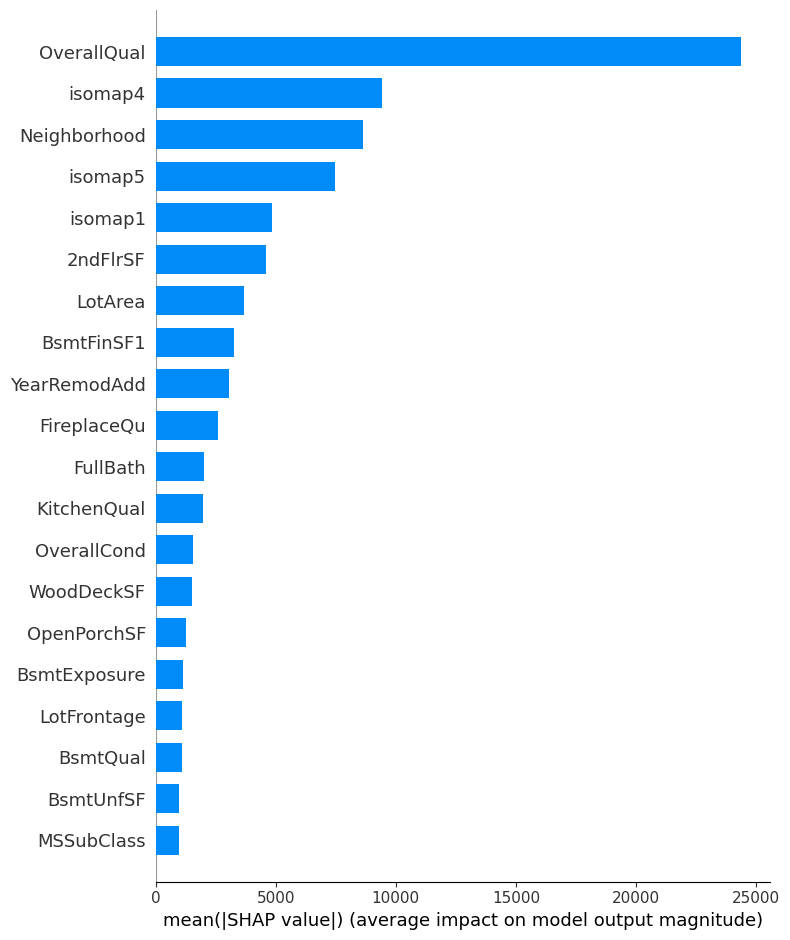

In [143]:
import shap
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

# Modeli eğitme
model = model_xgb
model.fit(X_train, y_train)

# SHAP değerlerini hesaplama
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# SHAP özet grafiğini gösterme
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=list(X_scaled.columns))

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import  LocallyLinearEmbedding
scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)
lle = LocallyLinearEmbedding(n_components=1 ,eigen_solver='dense')
X_scaled["lle1"] =lle.fit_transform(X_scaled[['GarageArea', 'GarageCars']])
X_scaled["lle2"] = lle.fit_transform(X_scaled[['Exterior1st', 'Exterior2nd']])
X_scaled["lle3"] = lle.fit_transform(X_scaled[['MasVnrArea', 'MasVnrType']])
X_scaled["lle4"] = lle.fit_transform(X_scaled[['1stFlrSF', 'TotalBsmtSF']])
X_scaled["lle5"] = lle.fit_transform(X_scaled[['GrLivArea', 'TotRmsAbvGrd']])
X_scaled.drop(['GarageArea', 'GarageCars','Exterior1st', 'Exterior2nd','MasVnrArea', 'MasVnrType','1stFlrSF', 'TotalBsmtSF','GrLivArea', 'TotRmsAbvGrd'],axis=1,inplace=True)

In [110]:
-cross_val_score(model_xgb, X_scaled, y, scoring="neg_root_mean_squared_error", cv=10).mean()

29737.94898072738

In [111]:
-cross_val_score(model_xgb, X_scaled, y_log_transformed, scoring="neg_root_mean_squared_error", cv=10).mean()

0.14967497589988593

In [150]:
from sklearn.preprocessing import StandardScaler
import umap
scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)
reducer = umap.UMAP(n_components=1)
X_scaled["reducer1"] =reducer.fit_transform(X_scaled[['GarageArea', 'GarageCars']])
X_scaled["reducer2"] = reducer.fit_transform(X_scaled[['Exterior1st', 'Exterior2nd']])
X_scaled["reducer3"] = reducer.fit_transform(X_scaled[['MasVnrArea', 'MasVnrType']])
X_scaled["reducer4"] = reducer.fit_transform(X_scaled[['1stFlrSF', 'TotalBsmtSF']])
X_scaled["reducer5"] = reducer.fit_transform(X_scaled[['GrLivArea', 'TotRmsAbvGrd']])
X_scaled.drop(['GarageArea', 'GarageCars','Exterior1st', 'Exterior2nd','MasVnrArea', 'MasVnrType','1stFlrSF', 'TotalBsmtSF','GrLivArea', 'TotRmsAbvGrd'],axis=1,inplace=True)

In [114]:
-cross_val_score(model_xgb, X_scaled, y, scoring="neg_root_mean_squared_error", cv=10).mean()

31265.978900654085

In [151]:
-cross_val_score(model_xgb, X_scaled, y_log_transformed, scoring="neg_root_mean_squared_error", cv=10).mean()

0.14988728010563745

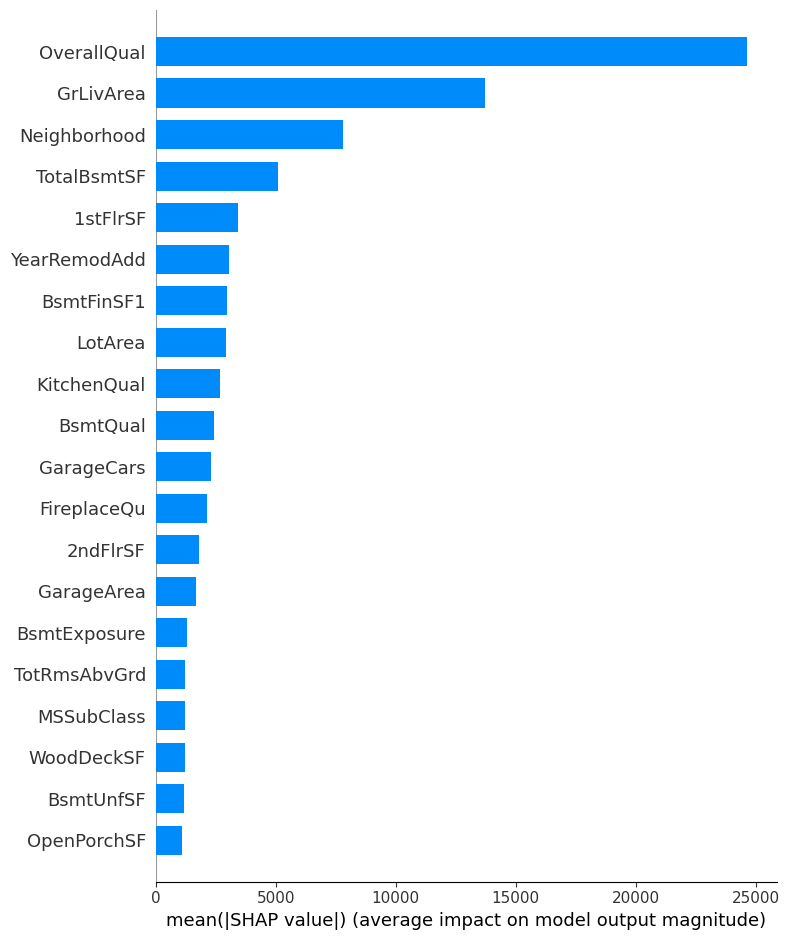

In [137]:
import shap
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Modeli eğitme
model = model_xgb
model.fit(X_train, y_train)

# SHAP değerlerini hesaplama
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# SHAP özet grafiğini gösterme
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=list(X.columns))

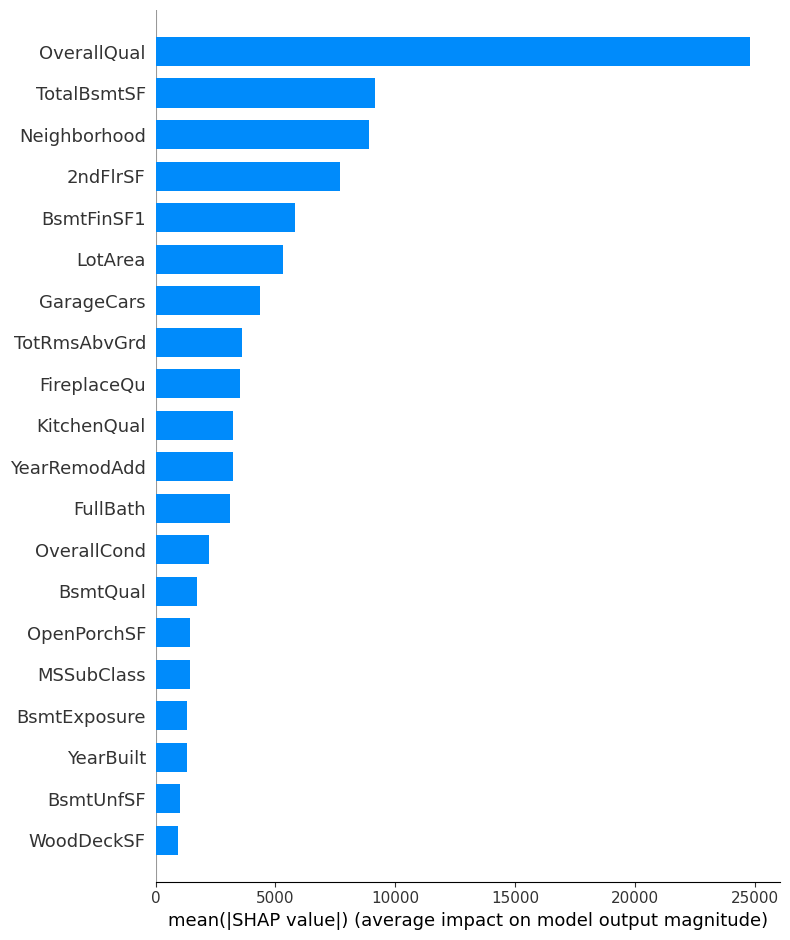

In [136]:
import shap
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

# Modeli eğitme
model = model_xgb
model.fit(X_train, y_train)

# SHAP değerlerini hesaplama
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# SHAP özet grafiğini gösterme
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=list(x2.columns))

In [134]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
feature_names = list(X.columns)
# Modeli eğitme
model = model_xgb
model.fit(X_train, y_train)

# LIME için açıklayıcı oluşturma
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=["Price"], mode="regression")

# Örnek bir gözlem için açıklama oluşturma
i = 20  # Örnek bir gözlem indisi
exp = explainer.explain_instance(X_test.iloc[i].values, model.predict)
exp.show_in_notebook(show_table=True)